**Kanchana T**

**2022UG000062**

**Reinforcement Learning**

# **Assignment 1**

# **Design, Analyse, and Simulate a Maze World as an MDP**

**1. Formalize the Grid Maze as an MDP**

In [8]:
import random
import statistics
import matplotlib.pyplot as plt

N = 8
START = (0, 0)
GOAL = (7, 7)

WALLS ={(1, 2), (2, 1), (2, 5), (3, 3), (4, 6), (5, 1), (5, 4), (6, 2)}

ACTIONS = {
    'U': (1, 0),
    'D': (-1, 0),
    'L': (0, -1),
    'R': (0, 1)
}

def in_bounds(state):
    r, c = state
    return 0 <= r < N and 0 <= c < N

def is_free(state, action):
    return in_bounds(state) and state not in WALLS

def transition(state, action):
    """Returns next_state, reward, done"""
    if state == GOAL:
        return state, 0, True

    dr, dc = ACTIONS[action]
    next_state = (state[0] + dr, state[1] + dc)

    #Case 1: Move into wall or off-grid -> stay, wall penalty
    if not in_bounds(next_state) or next_state in WALLS:
        return state, -1, False

    #Case 2: Reached goal
    if next_state == GOAL:
        return next_state, 10, True

    #Case 3: Normal move
    return next_state, -0.1, False

print("Start:", START)
print("Goal:", GOAL)
print("Walls:", WALLS)

s = START
print("\nExample moves:")
for a in ['U', 'R', 'R', 'U']:
    s, r, done = transition(s, a)
    print(f"Action {a} -> State {s}, Reward {r}, Done {done}")

Start: (0, 0)
Goal: (7, 7)
Walls: {(6, 2), (1, 2), (2, 1), (5, 4), (4, 6), (5, 1), (3, 3), (2, 5)}

Example moves:
Action U -> State (1, 0), Reward -0.1, Done False
Action R -> State (1, 1), Reward -0.1, Done False
Action R -> State (1, 1), Reward -1, Done False
Action U -> State (1, 1), Reward -1, Done False


**2. Random Policy**

In [9]:
def transition(state, action):
    """Environment transition function"""
    if state == GOAL:
        return state, 0, True
    dr, dc = ACTIONS[action]
    nxt = (state[0] + dr, state[1] + dc)

    if not in_bounds(nxt) or nxt in WALLS:
        return state, -1, False
    if nxt == GOAL:
        return nxt, 10, True
    return nxt, -0.1, False

def random_policy_action(state):
    return random.choice(list(ACTIONS.keys()))

def run_episode(max_steps=200):
    state = START
    trajectory = [(state, None)]
    total_reward = 0
    for step in range(max_steps):
        action = random_policy_action(state)
        next_state, reward, done = transition(state, action)
        trajectory.append((next_state, action))
        total_reward += reward
        state = next_state
        if done:
            return trajectory, step+1, total_reward, True
    return trajectory, max_steps, total_reward, False

def run_experiments(episodes=20):
    results = []
    for _ in range(episodes):
        traj, steps, reward, done = run_episode()
        results.append((traj, steps, reward, done))

    steps_list = [s for _,s,_,_ in results]
    rewards_list = [r for _,_,r,_ in results]

    stats = {
        "episodes": episodes,
        "successes": sum(1 for _,_,_,d in results if d),
        "steps_min": min(steps_list),
        "steps_max": max(steps_list),
        "steps_avg": statistics.mean(steps_list),
        "reward_min": min(rewards_list),
        "reward_max": max(rewards_list),
        "reward_avg": statistics.mean(rewards_list),
        "sample_trajectory": results[0]
    }
    return stats

stats = run_experiments(episodes=20)

print("\n=== Random Policy Results ===")
print(f"Episodes: {stats['episodes']}")
print(f"Successes: {stats['successes']}")
print(f"Steps -> Min: {stats['steps_min']}, Max: {stats['steps_max']}, Avg: {stats['steps_avg']:.2f}")
print(f"Rewards -> Min: {stats['reward_min']}, Max: {stats['reward_max']}, Avg: {stats['reward_avg']:.2f}")

traj, steps, reward, done = stats['sample_trajectory']
print("\n--- Sample Trajectory ---")
print(f"Reached goal: {done}, Steps: {steps}, Total Reward: {reward}")
for i in range(1, len(traj)):
    prev_state = traj[i-1][0]
    action = traj[i][1]
    next_state = traj[i][0]
    print(f"{prev_state} --{action}--> {next_state}")


=== Random Policy Results ===
Episodes: 20
Successes: 4
Steps -> Min: 79, Max: 200, Avg: 182.65
Rewards -> Min: -89.29999999999995, Max: -14.900000000000027, Avg: -66.60

--- Sample Trajectory ---
Reached goal: False, Steps: 200, Total Reward: -83.89999999999989
(0, 0) --D--> (0, 0)
(0, 0) --U--> (1, 0)
(1, 0) --R--> (1, 1)
(1, 1) --R--> (1, 1)
(1, 1) --U--> (1, 1)
(1, 1) --D--> (0, 1)
(0, 1) --D--> (0, 1)
(0, 1) --D--> (0, 1)
(0, 1) --D--> (0, 1)
(0, 1) --D--> (0, 1)
(0, 1) --U--> (1, 1)
(1, 1) --R--> (1, 1)
(1, 1) --L--> (1, 0)
(1, 0) --U--> (2, 0)
(2, 0) --U--> (3, 0)
(3, 0) --U--> (4, 0)
(4, 0) --L--> (4, 0)
(4, 0) --D--> (3, 0)
(3, 0) --R--> (3, 1)
(3, 1) --U--> (4, 1)
(4, 1) --L--> (4, 0)
(4, 0) --L--> (4, 0)
(4, 0) --U--> (5, 0)
(5, 0) --L--> (5, 0)
(5, 0) --U--> (6, 0)
(6, 0) --R--> (6, 1)
(6, 1) --L--> (6, 0)
(6, 0) --L--> (6, 0)
(6, 0) --D--> (5, 0)
(5, 0) --D--> (4, 0)
(4, 0) --R--> (4, 1)
(4, 1) --U--> (4, 1)
(4, 1) --U--> (4, 1)
(4, 1) --U--> (4, 1)
(4, 1) --U--> (4, 1)
(

**Random Policy Trajectory**

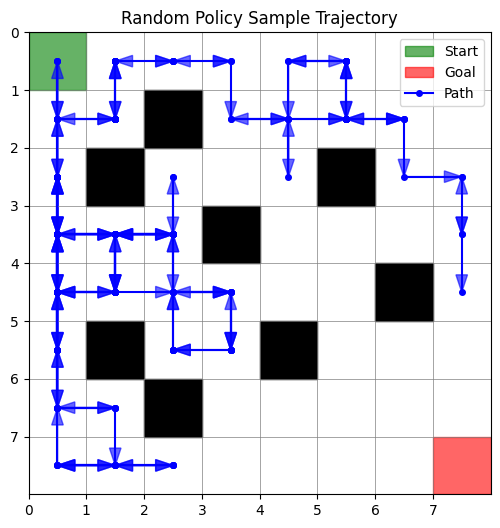

In [10]:
def draw_grid_path(trajectory, title="Agent Trajectory"):
    fig, ax = plt.subplots(figsize=(6,6))

    for x in range(N+1):
        ax.plot([x, x], [0, N], color="gray", linewidth=0.5)
    for y in range(N+1):
        ax.plot([0, N], [y, y], color="gray", linewidth=0.5)

    for (r,c) in WALLS:
        ax.add_patch(plt.Rectangle((c, r), 1, 1, color="black"))

    ax.add_patch(plt.Rectangle((START[1], START[0]), 1, 1, color="green", alpha=0.6, label="Start"))
    ax.add_patch(plt.Rectangle((GOAL[1], GOAL[0]), 1, 1, color="red", alpha=0.6, label="Goal"))

    xs = [c+0.5 for (r,c),_ in trajectory]
    ys = [r+0.5 for (r,c),_ in trajectory]

    ax.plot(xs, ys, marker="o", color="blue", linewidth=1.5, markersize=4, label="Path")

    for i in range(1, len(xs)):
        ax.arrow(xs[i-1], ys[i-1], xs[i]-xs[i-1], ys[i]-ys[i-1],
                 head_width=0.2, length_includes_head=True, color="blue", alpha=0.6)

    ax.set_xlim(0, N)
    ax.set_ylim(0, N)
    ax.set_aspect('equal')
    ax.set_xticks(range(N))
    ax.set_yticks(range(N))
    ax.invert_yaxis()
    ax.set_title(title)
    ax.legend(loc="upper right")
    plt.show()


draw_grid_path(traj, title="Random Policy Sample Trajectory")

**3. Greedy Policy**

In [11]:
def transition(state, action):
    """Environment transition function"""
    if state == GOAL:
        return state, 0, True
    dr, dc = ACTIONS[action]
    nxt = (state[0] + dr, state[1] + dc)

    if not in_bounds(nxt) or nxt in WALLS:
        return state, -1, False
    if nxt == GOAL:
        return nxt, 10, True
    return nxt, -0.1, False

def manhattan(state):
    return abs(state[0]-GOAL[0]) + abs(state[1]-GOAL[1])

def greedy_policy_action(state):
    if state == GOAL:
        return random.choice(list(ACTIONS.keys()))
    candidates = []
    for a,(dr,dc) in ACTIONS.items():
        nxt = (state[0]+dr, state[1]+dc)
        if in_bounds(nxt) and nxt not in WALLS:
            candidates.append((manhattan(nxt), a))
    if candidates:
        candidates.sort(key=lambda x: x[0])
        return candidates[0][1]
    return random.choice(list(ACTIONS.keys()))

def run_episode_greedy(max_steps=200):
    state = START
    trajectory = [(state, None)]
    total_reward = 0
    for step in range(max_steps):
        action = greedy_policy_action(state)
        next_state, reward, done = transition(state, action)
        trajectory.append((next_state, action))
        total_reward += reward
        state = next_state
        if done:
            return trajectory, step+1, total_reward, True
    return trajectory, max_steps, total_reward, False

def run_experiments_greedy(episodes=20):
    results = []
    for _ in range(episodes):
        traj, steps, reward, done = run_episode_greedy()
        results.append((traj, steps, reward, done))

    steps_list = [s for _,s,_,_ in results]
    rewards_list = [r for _,_,r,_ in results]

    stats = {
        "episodes": episodes,
        "successes": sum(1 for _,_,_,d in results if d),
        "steps_min": min(steps_list),
        "steps_max": max(steps_list),
        "steps_avg": statistics.mean(steps_list),
        "reward_min": min(rewards_list),
        "reward_max": max(rewards_list),
        "reward_avg": statistics.mean(rewards_list),
        "sample_trajectory": results[0]
    }
    return stats

stats_greedy = run_experiments_greedy(episodes=20)

print("\n=== Greedy Policy Results ===")
print(f"Episodes: {stats_greedy['episodes']}")
print(f"Successes: {stats_greedy['successes']}")
print(f"Steps -> Min: {stats_greedy['steps_min']}, Max: {stats_greedy['steps_max']}, Avg: {stats_greedy['steps_avg']:.2f}")
print(f"Rewards -> Min: {stats_greedy['reward_min']}, Max: {stats_greedy['reward_max']}, Avg: {stats_greedy['reward_avg']:.2f}")

traj, steps, reward, done = stats_greedy['sample_trajectory']
print("\n--- Sample Greedy Trajectory ---")
print(f"Reached goal: {done}, Steps: {steps}, Total Reward: {reward}")
for i in range(1, len(traj)):
    prev_state = traj[i-1][0]
    action = traj[i][1]
    next_state = traj[i][0]
    print(f"{prev_state} --{action}--> {next_state}")


=== Greedy Policy Results ===
Episodes: 20
Successes: 20
Steps -> Min: 14, Max: 14, Avg: 14.00
Rewards -> Min: 8.7, Max: 8.7, Avg: 8.70

--- Sample Greedy Trajectory ---
Reached goal: True, Steps: 14, Total Reward: 8.7
(0, 0) --U--> (1, 0)
(1, 0) --U--> (2, 0)
(2, 0) --U--> (3, 0)
(3, 0) --U--> (4, 0)
(4, 0) --U--> (5, 0)
(5, 0) --U--> (6, 0)
(6, 0) --U--> (7, 0)
(7, 0) --R--> (7, 1)
(7, 1) --R--> (7, 2)
(7, 2) --R--> (7, 3)
(7, 3) --R--> (7, 4)
(7, 4) --R--> (7, 5)
(7, 5) --R--> (7, 6)
(7, 6) --R--> (7, 7)


**Greedy Policy Trajectory**

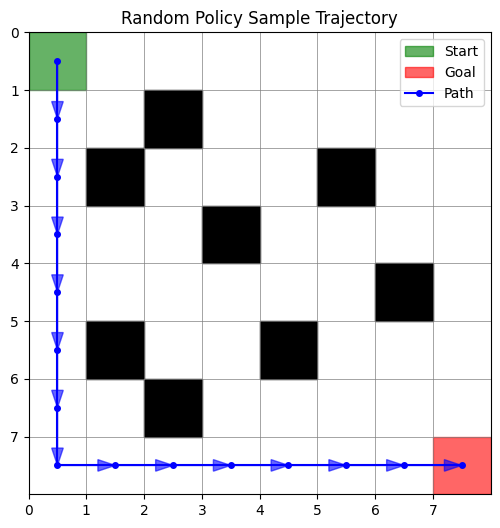

In [12]:
def draw_grid_path(trajectory, title="Agent Trajectory"):
    fig, ax = plt.subplots(figsize=(6,6))

    for x in range(N+1):
        ax.plot([x, x], [0, N], color="gray", linewidth=0.5)
    for y in range(N+1):
        ax.plot([0, N], [y, y], color="gray", linewidth=0.5)

    for (r,c) in WALLS:
        ax.add_patch(plt.Rectangle((c, r), 1, 1, color="black"))

    ax.add_patch(plt.Rectangle((START[1], START[0]), 1, 1, color="green", alpha=0.6, label="Start"))
    ax.add_patch(plt.Rectangle((GOAL[1], GOAL[0]), 1, 1, color="red", alpha=0.6, label="Goal"))

    xs = [c+0.5 for (r,c),_ in trajectory]
    ys = [r+0.5 for (r,c),_ in trajectory]

    ax.plot(xs, ys, marker="o", color="blue", linewidth=1.5, markersize=4, label="Path")

    for i in range(1, len(xs)):
        ax.arrow(xs[i-1], ys[i-1], xs[i]-xs[i-1], ys[i]-ys[i-1],
                 head_width=0.2, length_includes_head=True, color="blue", alpha=0.6)

    ax.set_xlim(0, N)
    ax.set_ylim(0, N)
    ax.set_aspect('equal')
    ax.set_xticks(range(N))
    ax.set_yticks(range(N))
    ax.invert_yaxis()
    ax.set_title(title)
    ax.legend(loc="upper right")
    plt.show()


draw_grid_path(traj, title="Random Policy Sample Trajectory")

**4. Compare Random vs Greedy Policies with plots**

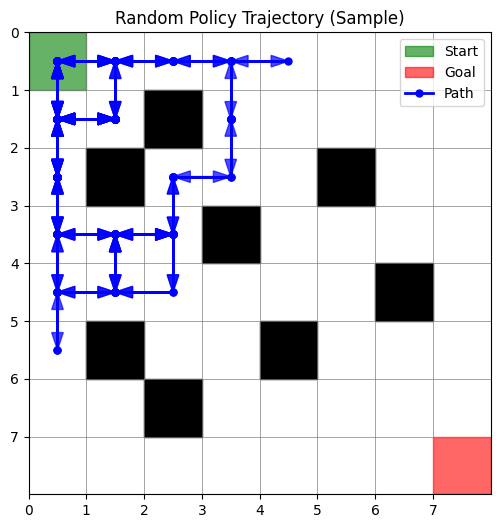

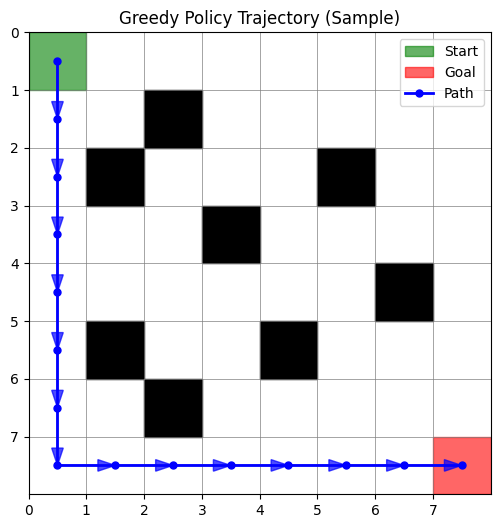

/tmp/ipython-input-550534430.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([random_steps, greedy_steps], labels=["Random", "Greedy"])
/tmp/ipython-input-550534430.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([random_rewards, greedy_rewards], labels=["Random", "Greedy"])


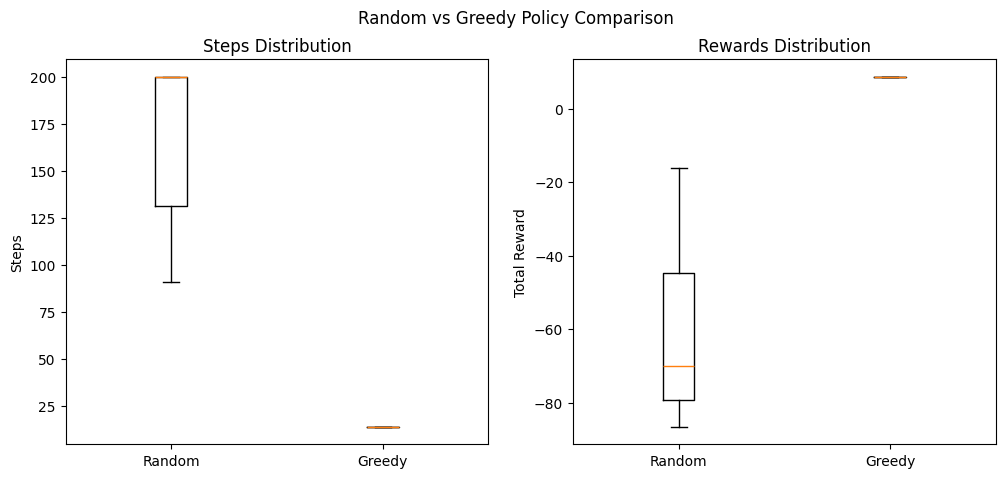

In [13]:
def draw_grid_path(trajectory, title="Trajectory"):
    fig, ax = plt.subplots(figsize=(6,6))

    for x in range(N+1):
        ax.plot([x, x], [0, N], color="gray", linewidth=0.5)
    for y in range(N+1):
        ax.plot([0, N], [y, y], color="gray", linewidth=0.5)

    for (r,c) in WALLS:
        ax.add_patch(plt.Rectangle((c, r), 1, 1, color="black"))

    ax.add_patch(plt.Rectangle((START[1], START[0]), 1, 1, color="green", alpha=0.6, label="Start"))
    ax.add_patch(plt.Rectangle((GOAL[1], GOAL[0]), 1, 1, color="red", alpha=0.6, label="Goal"))

    xs = [c+0.5 for (r,c),_ in trajectory]
    ys = [r+0.5 for (r,c),_ in trajectory]

    ax.plot(xs, ys, marker="o", color="blue", linewidth=2, markersize=5, label="Path")
    for i in range(1, len(xs)):
        ax.arrow(xs[i-1], ys[i-1], xs[i]-xs[i-1], ys[i]-ys[i-1],
                 head_width=0.2, length_includes_head=True, color="blue", alpha=0.7)

    ax.set_xlim(0, N)
    ax.set_ylim(0, N)
    ax.set_aspect('equal')
    ax.set_xticks(range(N))
    ax.set_yticks(range(N))
    ax.invert_yaxis()
    ax.set_title(title)
    ax.legend(loc="upper right")
    plt.show()

def plot_comparison(random_stats, greedy_stats, random_results, greedy_results):
    random_steps = [s for _,s,_,_ in random_results]
    random_rewards = [r for _,_,r,_ in random_results]
    greedy_steps = [s for _,s,_,_ in greedy_results]
    greedy_rewards = [r for _,_,r,_ in greedy_results]

    fig, axs = plt.subplots(1,2, figsize=(12,5))

    axs[0].boxplot([random_steps, greedy_steps], labels=["Random", "Greedy"])
    axs[0].set_title("Steps Distribution")
    axs[0].set_ylabel("Steps")

    axs[1].boxplot([random_rewards, greedy_rewards], labels=["Random", "Greedy"])
    axs[1].set_title("Rewards Distribution")
    axs[1].set_ylabel("Total Reward")

    plt.suptitle("Random vs Greedy Policy Comparison")
    plt.show()


def run_experiments_random(episodes=20):
    results = []
    for _ in range(episodes):
        traj, steps, reward, done = run_episode()
        results.append((traj, steps, reward, done))
    return results

def run_experiments_greedy(episodes=20):
    results = []
    for _ in range(episodes):
        traj, steps, reward, done = run_episode_greedy()
        results.append((traj, steps, reward, done))
    return results

random_results = run_experiments_random(episodes=20)
greedy_results = run_experiments_greedy(episodes=20)

random_traj = random_results[0][0]
greedy_traj = greedy_results[0][0]

draw_grid_path(random_traj, "Random Policy Trajectory (Sample)")
draw_grid_path(greedy_traj, "Greedy Policy Trajectory (Sample)")

plot_comparison(None, None, random_results, greedy_results)